# Red Hat Business Value

This competition was hosted on Kaggle 
a few years back, and the dataset is a really good business use case for 
our study. The archived competition is available at www.kaggle.com/c/predicting-red-hat-business-value. 

##  Problem Statement

The high-level problem statement is mentioned in the competition’s 
description page. It highlights the problem that deals with **predicting high-value customers** for their business based on the operational interaction data and thereby helping the **company effectively prioritize resources** to generate more business and **serve its customers better**.

Let’s have a look at the problem statement from a more business- 
centric view. We will start by understanding the customer better. The 
organization is an American multinational software company that 
provides open source software products to the enterprise community. 
Their primary product is Red Hat Enterprise Linux, the most popular 
distribution of Linux OS, used by various large enterprises. In its services, it 
helps organizations align their IT strategies by providing enterprise-grade 
solutions through an open business model and an affordable, predictable 
subscription model. These subscriptions from large enterprise customers 
create a substantial part of their revenue, and therefore it is of paramount 
importance for them to understand their valuable customers and serve 
them better by prioritizing resources and strategies to drive improved 
business value.

-  __How Can We Identify a Potential Customer?__

Red Hat has been in existence for over 25 years. In the long stint of 
business, they have accumulated and captured a vast amount of data from 
customer interactions and their descriptive attributes. This rich source 
of data could be a gold mine of patterns that can help in identifying a 
potential customer by studying the vast and complex historical patterns in 
the interaction data.
With the ever-growing popularity and prowess of DL, we can develop 
a DNN that can learn from historic customer attributes and operational 
interaction data to understand the deep patterns and predict whether 
a new customer will potentially be a high-value customer for various 
business services.
Therefore, we will develop and train a DNN to learn the chances that a 
customer will be a potential high-value customer, using various customer 
attributes and operational interaction attributes.

In [1]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display
%matplotlib inline

In [2]:
#Import the 2 datasets provided in the Zip Folder
df = pd.read_csv("./data/predicting-red-hat-business-value/act_train.csv")
people = pd.read_csv("./data/predicting-red-hat-business-value/people.csv")

In [3]:
#Explore the shape of the datasets
print("Shape of DF:",df.shape)
print("Shape of People DF:",people.shape)

Shape of DF: (2197291, 15)
Shape of People DF: (189118, 41)


In [4]:
display.display(df.head())
print("\n\n People\n")
display.display(people.head())

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0




 People



,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [5]:
#Calculating the % of Null values in each column for activity data
df.isnull().sum()/df.shape[0]

people_id            0.000000
activity_id          0.000000
date                 0.000000
activity_category    0.000000
char_1               0.928268
char_2               0.928268
char_3               0.928268
char_4               0.928268
char_5               0.928268
char_6               0.928268
char_7               0.928268
char_8               0.928268
char_9               0.928268
char_10              0.071732
outcome              0.000000
dtype: float64

Let’s check how many missing data points the customer dataset has. 
Since the customer dataset has around 40+ features, we can combine the 
missing value percentages for all columns together with the preceding 
code, instead of looking at each column individually.

In [6]:
#Calculate the % of null values in for the entire dataset
people.isnull().sum().sum()

0

 We need to drop the columns in the activity data that 
have 90% missing values, as they cannot be fixed. Secondly, the “date” and 
“char_10” columns are present in both datasets. In order to avoid a name 
clash, let us rename the “date” column in the activity dataset to “activity_
date” and “char_10” in the activity data as “activity_type.” Next, we also 
need to fix the missing values in the “activity_type” column. Once these 
two tasks are accomplished, we will join the two datasets and explore the 
consolidated data.

In [7]:
#Create the list of columns to drop from activity data
columns_to_remove = ["char_"+str(x) for x in  np.arange(1,10)]
print("Columns to remove:",columns_to_remove)

Columns to remove: ['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9']


In [8]:
#Remove the columns from the activity data
df = df[list(set(df.columns) - set(columns_to_remove))]

In [9]:
df.head()

,date,people_id,activity_id,outcome,activity_category,char_10
0,2023-08-26,ppl_100,act2_1734928,0,type 4,type 76
1,2022-09-27,ppl_100,act2_2434093,0,type 2,type 1
2,2022-09-27,ppl_100,act2_3404049,0,type 2,type 1
3,2023-08-04,ppl_100,act2_3651215,0,type 2,type 1
4,2023-08-26,ppl_100,act2_4109017,0,type 2,type 1


In [10]:
#Rename the 2 columns to avoid name clashes in merged data
df = df.rename(columns={"date": "activity_date",
                        "char_10": "activity_type"})

In [11]:
df.head()

,activity_date,people_id,activity_id,outcome,activity_category,activity_type
0,2023-08-26,ppl_100,act2_1734928,0,type 4,type 76
1,2022-09-27,ppl_100,act2_2434093,0,type 2,type 1
2,2022-09-27,ppl_100,act2_3404049,0,type 2,type 1
3,2023-08-04,ppl_100,act2_3651215,0,type 2,type 1
4,2023-08-26,ppl_100,act2_4109017,0,type 2,type 1


In [12]:
#Replace nulls in the activity_type column with the mode
df["activity_type"] = df["activity_type"].fillna(df["activity_type"].mode()[0])

In [13]:
df.isnull().sum().sum()

0

In [14]:
#Print the shape of the final activity dataset
print("Shape of DF:",df.shape)

Shape of DF: (2197291, 6)


We can now join the two datasets to create a consolidate activity and 
customer attributes dataset.

In [15]:
#Merge the 2 datasets on 'people_id' key
df_new = df.merge(people, on=["people_id"], how="inner")
print("Shape before merging:", df.shape)
print("Shape after merging :", df_new.shape)

Shape before merging: (2197291, 6)
Shape after merging : (2197291, 46)


 the target (i.e., the variable we want to predict), named 
__“outcome”__ in the dataset. We can check the distribution between potential 
vs. nonpotential customers.

In [16]:
print("Unique values for outcome:",df_new["outcome"].unique())
print("\nPercentage of distribution for outcome-")
print(df_new["outcome"].value_counts()/df_new.shape[0])

Unique values for outcome: [0 1]

Percentage of distribution for outcome-
0    0.556046
1    0.443954
Name: outcome, dtype: float64


We can see that there is a good mix in the distribution of potential 
customers, as around 45% are potential customers.

###  Data Engineering

In [17]:
#Checking the distinct datatypes in the dataset
print("Distinct DataTypes:",list(df_new.dtypes.unique()))

Distinct DataTypes: [dtype('O'), dtype('int64'), dtype('bool')]


In [18]:
df_new.dtypes

activity_date        object
people_id            object
activity_id          object
outcome               int64
activity_category    object
activity_type        object
char_1               object
group_1              object
char_2               object
date                 object
char_3               object
char_4               object
char_5               object
char_6               object
char_7               object
char_8               object
char_9               object
char_10                bool
char_11                bool
char_12                bool
char_13                bool
char_14                bool
char_15                bool
char_16                bool
char_17                bool
char_18                bool
char_19                bool
char_20                bool
char_21                bool
char_22                bool
char_23                bool
char_24                bool
char_25                bool
char_26                bool
char_27                bool
char_28             

The 
following snippet of code converts the Boolean columns in the dataframe 
into numeric (1 and 0)–based values.

In [ ]:
#Create a temp dataset with the datatype of columns
temp = pd.DataFrame(df_new.dtypes)
temp.columns = ["DataType"]
#Create a list with names of all Boolean columns
boolean_columns = temp.index[temp["DataType"] == 'bool'].values
print("Boolean columns - \n",boolean_columns)

Boolean columns - 
 ['char_10' 'char_11' 'char_12' 'char_13' 'char_14' 'char_15' 'char_16'
 'char_17' 'char_18' 'char_19' 'char_20' 'char_21' 'char_22' 'char_23'
 'char_24' 'char_25' 'char_26' 'char_27' 'char_28' 'char_29' 'char_30'
 'char_31' 'char_32' 'char_33' 'char_34' 'char_35' 'char_36' 'char_37']


In [ ]:
#Convert all boolean columns to Binary numeric values
for column in boolean_columns:
    df_new[column] = np.where(df_new[column] == True, 1, 0)
    
print("\nDistinct DataTypes after processing:",df.dtypes.unique())


Distinct DataTypes after processing: [dtype('O') dtype('int64')]


Let us now have a look at the categorical features

In [ ]:
#Extracting the object columns from the above dataframe
categorical_columns = temp.index[temp["DataType"] == 'O'].values

#Check the number of distinct values in each categorical column
for column in categorical_columns:
     print(column+" column has :",
           str(len(df_new[column].unique()))+" distinct values")

activity_date column has : 411 distinct values
people_id column has : 151295 distinct values
activity_id column has : 2197291 distinct values
activity_category column has : 7 distinct values
activity_type column has : 6515 distinct values
char_1 column has : 2 distinct values
group_1 column has : 29899 distinct values
char_2 column has : 3 distinct values
date column has : 1196 distinct values
char_3 column has : 43 distinct values
char_4 column has : 25 distinct values
char_5 column has : 9 distinct values
char_6 column has : 7 distinct values
char_7 column has : 25 distinct values
char_8 column has : 8 distinct values
char_9 column has : 9 distinct values


__activity_date, activity_id, activity_type, people_id, group_1__ and **date**  have high 
numbers of distinct values. It would be difficult to convert them into a 
one-hot encoded form, as they will consume too much memory during 
processing. (_In case you have the luxury of surplus RAM, feel free to convert 
them to a one-hot encoded data form._)

 the date and activity_date columns are date values; 
therefore, we can convert them into data-related features

In [ ]:
#Create date related features for 'date' in customer data
df_new["date"] = pd.to_datetime(df_new["date"])

df_new["Year"] = df_new["date"].dt.year
df_new["Month"] = df_new["date"].dt.month
df_new["Quarter"] = df_new["date"].dt.quarter
df_new["Week"] = df_new["date"].dt.week
df_new["WeekDay"] = df_new["date"].dt.weekday
df_new["Day"] = df_new["date"].dt.day

In [ ]:
#Create date related features for 'date' in activity data
df_new["activity_date"] = pd.to_datetime(df_new["activity_date"])

df_new["Activity_Year"] = df_new["activity_date"].dt.year
df_new["Activity_Month"] = df_new["activity_date"].dt.month
df_new["Activity_Quarter"] = df_new["activity_date"].dt.quarter
df_new["Activity_Week"] = df_new["activity_date"].dt.week
df_new["Activity_WeekDay"] = df_new["activity_date"].dt.weekday
df_new["Activity_Day"] = df_new["activity_date"].dt.day

In [ ]:
#Delete the original date columns
del(df_new["date"])
del(df_new["activity_date"])

In [ ]:
print("Shape of data after create Date Features:",df_new.shape)

Shape of data after create Date Features: (2197291, 56)


In [ ]:
print(df_new[["people_id", "activity_type",
              "activity_id", "group_1"]].head())

  people_id activity_type   activity_id      group_1
0   ppl_100       type 76  act2_1734928  group 17304
1   ppl_100        type 1  act2_2434093  group 17304
2   ppl_100        type 1  act2_3404049  group 17304
3   ppl_100        type 1  act2_3651215  group 17304
4   ppl_100        type 1  act2_4109017  group 17304


It seems that we can convert all of the preceding categorical columns 
into numeric by extracting the relevant numeric ID from each of them, 
since each of these columns has values in the form of someText_
someNumber. Rather than converting these categorical columns into 
a bloated one-hot encoded dataset, we can temporarily use them as 
numeric features. However, if the performance of the model doesn’t reach 
our desired expectations after several experiments, we might have to revisit 
these features and try our best to incorporate them differently. But for now, 
we can consider them as numeric features.

In [ ]:
#For people ID, we would need to extract values after '_'
df_new.people_id = df_new.people_id.apply(lambda x: x.split("_")[1])
df_new.people_id = pd.to_numeric(df_new.people_id)

In [ ]:
#For activity ID also, we would need to extract values after '_'
df_new.activity_id = df_new.activity_id.apply(lambda x: x.split("_")[1])
df_new.activity_id = pd.to_numeric(df_new.activity_id)

In [ ]:
#For group_1 , we would need to extract values after "
df_new.group_1 = df_new.group_1.apply(lambda x: x.split(" ")[1])
df_new.group_1 = pd.to_numeric(df_new.group_1)

#For activity_type , we would need to extract values after "
df_new.activity_type = df_new.activity_type.apply(lambda x: x.split(" ")[1])
df_new.activity_type = pd.to_numeric(df_new.activity_type)

In [ ]:
#Double check the new values in the dataframe
print(df_new[["people_id","activity_type","activity_id", "group_1"]].head())

   people_id  activity_type  activity_id  group_1
0      100.0             76    1734928.0    17304
1      100.0              1    2434093.0    17304
2      100.0              1    3404049.0    17304
3      100.0              1    3651215.0    17304
4      100.0              1    4109017.0    17304


In [ ]:
df_new[["people_id","activity_type","activity_id", "group_1"]].dtypes

people_id        float64
activity_type      int64
activity_id      float64
group_1            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define a function that will intake the raw dataframe and the 
# column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns = column_names))

In [ ]:
# Reclassify numerical and categorical variables
temp = pd.DataFrame(df_new.dtypes)
temp.columns = ["DataType"]

categorical_columns = temp.index[temp["DataType"] == 'O'].values

# df_new.dtypes.unique() # to check how many type are in our dataset

In [ ]:
# Since the above function converts the column, one at a time
# We create a loop to create the final dataset with all features
target = ["outcome"]
numeric_columns = list(set(
    temp.index[(temp.DataType =="float64") |
               (temp.DataType =="int64")   |
               (temp.DataType =="int32")].values) - set(target))
temp = df_new[numeric_columns]

In [ ]:
# # Remove "date" and "activity_date"
# categorical_columns_rm = np.delete(categorical_columns, [0, 2, 3, 4, 6, 8], 0)

In [ ]:
for column in categorical_columns:
    temp_df = create_ohe(df_new, column)
    temp = pd.concat([temp,temp_df],axis=1)
    
print("\nShape of final df after onehot encoding:",temp.shape)

C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning,


Shape of final df after onehot encoding: (2197291, 183)


 we have converted and kept the date- 
related features, as they are in their numeric form and not converted into 
the one-hot encoded form. This choice is optional. I considered the size 
of the dataset, with ~180 columns, as large enough to start with. We will 
conduct a few basic experiments, and if we don’t see good performance, 
we will then need to revisit the data.

In [ ]:
# Checking that there is no missing data
temp.isnull().sum().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split

# split the final dataset into train and test with 80:20
x_train, x_test, y_train, y_test = train_test_split(
    temp, df_new[target], test_size=0.2, random_state=2018)

# split the train dataset further into train and validation  
# with 90:10
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=2018)

# Check the shape of each new dataset created
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (1582048, 183)
Shape of x_test: (439459, 183)
Shape of x_val: (175784, 183)
Shape of y_train: (1582048, 1)
Shape of y_test: (439459, 1)
Shape of y_val: (175784, 1)


 We need to define a baseline benchmark that will 
help us set the threshold performance we should expect from our models 
for them to be considered useful and acceptable.

In our use 
case, we have the outcome as either 0 or 1. To validate the usefulness of a 
model, we should **compare the result to what would have happened if we 
never had a model**. In that case, we would *make the largest class as the 
prediction for all customers* and check what the accuracy looks like.

If you remember, the target in our use case (i.e., the outcome variable) 
has a good distribution of 1’s and 0’s. Here is the distribution of the 
outcome variable between 1 and 0.

In [ ]:
#Checking the distribution of values in the target
df_new["outcome"].value_counts()/df_new.shape[0]

0    0.556046
1    0.443954
Name: outcome, dtype: float64

So, with the preceding distribution, we can say that if we do not 
have any model and make all predictions as 0 (the largest class)—that 
is, predicting that none of the customers are potential high-value 
customers—then we would end up with at least 55.6% accuracy either 
way. This is our baseline accuracy. If we build a model that delivers us 
an overall accuracy anywhere below our benchmark, then it would be of 
practically no use.

## Designing the DNN for Classification

We are building a DNN with just one layer and 
$256$ neurons. We have used **binary_crossentropy** (*since this a binary 
classification problem*) as the loss function and accuracy as the metric 
to monitor. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
#Design the deep neural network [Small + 1 layer]
model  = Sequential()
model.add(Dense(256, input_dim = x_train.shape[1], activation="relu"))
model.add(Dense(256, activation="relu"))

# activation = sigmoid for binary classification
model.add(Dense(1,activation = "sigmoid")) 
model.compile(optimizer = "Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.fit(x_train,y_train,
          validation_data = (x_val,y_val),
          epochs = 3, batch_size = 64)

Instructions for updating:
Use tf.cast instead.
Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 123s 78us/step - loss: 8.8628 - acc: 0.4441 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 2/3
1582048/1582048 [==============================] - 135s 85us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 3/3
1582048/1582048 [==============================] - 119s 75us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455


 you will 
see that the overall accuracy for training as well as validation datasets was 
around $0.44 (44\%)$, which is way lower than our baseline accuracy$55$. We can 
therefore conclude that training this model further might not be a fruitful 
idea.
Let’s try a deeper network for the same number of neurons. So, we 
keep everything the same but add one more layer with the same number of 
neurons.

In [ ]:
#Design the deep neural network [Small + 2 layers]
model  = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],
                activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train,
          validation_data = (x_val,y_val), 
          epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 132s 84us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545
Epoch 2/3
1582048/1582048 [==============================] - 120s 76us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545
Epoch 3/3
1582048/1582048 [==============================] - 119s 75us/step - loss: 7.1534 - acc: 0.5562 - val_loss: 7.1813 - val_acc: 0.5545


Again, as we can see, the initial results are not at all promising. The 
training and validation accuracy from the deeper network are not anywhere 
close to what we would expect. Instead of trying another deeper network 
with, say, three to five layers, let us try training with a bigger (medium-sized) 
network. We shall use a new architecture with just one layer but 512 neurons 
this time. Let us again train for three epochs and have a look at the metrics to 
check whether it is in line with what we would expect.

In [53]:
#Design the deep neural network [Medium + 1 layers]
model  = Sequential()
model.add(Dense(512, input_dim = x_train.shape[1], activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [54]:
model.fit(x_train, y_train, 
          validation_data = (x_val,y_val),
          epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 105s 67us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 2/3
1582048/1582048 [==============================] - 98s 62us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 3/3
1582048/1582048 [==============================] - 110s 69us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455


We can see that the results have improved, but only by just a bit. We see 
an accuracy of around 55% for the training and validation datasets, but these 
results are again not great, though better than what we previously had.

## Revisiting the Data

The initial attempts to build a model with decent results have failed. We 
can further increase the size and the depth of the network, but this would 
only marginally increase the network performance.

We can standardize the input data with a ‘Standardscaler’ or 
a ‘Minmaxscaler’ using Python’s sklearn package’s tools or we can explore 
the options to revisit the one-hot encoding exercise for the categorical 
features we encoded as numeric. From these two options, the easiest and 
the least time-consuming would be standardizing or normalizing the data.

###  Standardize, Normalize, or Scale the Data

 To improve our model performance, let us try 
standardizing our data.

In standardization, we transform the data into a form where the mean 
is 0 and the standard deviation is 1. The distribution of the data in this 
form is a great input candidate for our neuron’s activation function and 
therefore improves the ability to learn more appropriately.
In its simplest form, standardization can be explained by the following 
example using a dummy input dataset. We perform standard scaling; look 
at the transformed values, the mean, and its standard deviation; and finally 
inverse transform the output to its original form.

In [ ]:
#Create a dummy input
dummy_input = np.arange(1,10)
print("Dummy Input = ",dummy_input)
from sklearn.preprocessing  import StandardScaler
#Create a standardscaler instance and fit the data
scaler = StandardScaler()
output = scaler.fit_transform(dummy_input.reshape(-1,1))

print("Output =\n ",list(output))
print("Output's Mean = ",output.mean())
print("Output's Std Dev = ",output.std())
print("\nAfter Inverse Transforming = \n",list(scaler.inverse_transform(output)))

##  Transforming the Input Data

To transform the input data for the development of the model, please note 
that we should only use the training data to fit the scaler transformation 
and use the same fitted object to transform the validation and test input 
data. _(Please note that we are not making any transformations to the labels or the target.)_

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\kabon\AppData\Local\conda\conda\envs\aims\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


In [56]:
#Design the deep neural network [Medium + 1 layers]
model  = Sequential()
model.add(Dense(512, input_dim = x_train.shape[1], activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [57]:
model.fit(x_train_scaled, y_train, 
          validation_data = (x_val_scaled, y_val),
          epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 105s 67us/step - loss: 0.2312 - acc: 0.8992 - val_loss: 0.1954 - val_acc: 0.9201
Epoch 2/3
1582048/1582048 [==============================] - 114s 72us/step - loss: 0.1710 - acc: 0.9313 - val_loss: 0.1679 - val_acc: 0.9331
Epoch 3/3
1582048/1582048 [==============================] - 110s 69us/step - loss: 0.1459 - acc: 0.9440 - val_loss: 0.1466 - val_acc: 0.9452


We have now an almost 95% accuracy 
on the training and validation datasets. Let’s use this model to evaluate the 
model performance on the test datasets we created earlier.

In [58]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
     print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

439459/439459 [==============================] - 14s 32us/step
Metric  loss : 0.15
Metric  acc : 0.94


We see great results on the test dataset. 

Let’s try improving the 
architecture a bit and see. We can a medium-sized deeper network to see if 
the results are better than with the medium-sized network.

In [59]:
#Designing the Deep Neural Network [Medium – 2 Layers]
model  = Sequential()
model.add(Dense(512, input_dim = x_train_scaled.shape[1], activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation = "sigmoid"))

In [60]:
model.compile(optimizer = "Adam", loss="binary_crossentropy", 
              metrics=["accuracy"])
model.fit(x_train_scaled, y_train, 
          validation_data = (x_val_scaled, y_val),
          epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 370s 234us/step - loss: 0.1955 - acc: 0.9143 - val_loss: 0.1406 - val_acc: 0.9415
Epoch 2/3
1582048/1582048 [==============================] - 346s 219us/step - loss: 0.1186 - acc: 0.9519 - val_loss: 0.1085 - val_acc: 0.9567
Epoch 3/3
1582048/1582048 [==============================] - 342s 216us/step - loss: 0.0924 - acc: 0.9637 - val_loss: 0.0900 - val_acc: 0.9652


In [61]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
     print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

439459/439459 [==============================] - 27s 61us/step
Metric  loss : 0.09
Metric  acc : 0.97


 let’s take 
a final shot with a larger and deeper network and see the results with 3 
epochs. In case we see only small improvements, we will use the same 
architecture for 15 epochs and use the model for our final predictions.

In [63]:
#Designing the Deep Neural Network [Large – 2 Layers]
model  = Sequential()
model.add(Dense(1024, input_dim = x_train_scaled.shape[1], activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer = "Adam", loss="binary_crossentropy", 
              metrics=["accuracy"])
model.fit(x_train_scaled, y_train, 
          validation_data = (x_val_scaled, y_val),
          epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1460096/1582048 [==========================>...] - ETA: 1:24 - loss: 0.0904 - acc: 0.9648

In [65]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
     print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

439459/439459 [==============================] - 86s 195us/step
Metric  loss : 0.09
Metric  acc : 0.97


There is not really a lot of improvement in the performance of the model due to increasing the size 
from a medium (512-neuron) to a larger (1024-neuron) architecture. 
With these results validating our experiments, let’s train a medium-sized 
(512-neuron) deep network with two layers for 15 epochs

In [66]:
#Designing the Deep Neural Network [Medium – 2 Layers]
model  = Sequential()
model.add(Dense(512, input_dim = x_train_scaled.shape[1], activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer = "Adam", loss="binary_crossentropy", 
              metrics=["accuracy"])
model.fit(x_train_scaled, y_train, 
          validation_data = (x_val_scaled, y_val),
          epochs=15, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/15
1582048/1582048 [==============================] - 426s 269us/step - loss: 0.1954 - acc: 0.9143 - val_loss: 0.1376 - val_acc: 0.9433
Epoch 2/15
1582048/1582048 [==============================] - 439s 278us/step - loss: 0.0920 - acc: 0.9639 - val_loss: 0.0888 - val_acc: 0.9661
Epoch 4/15
1582048/1582048 [==============================] - 434s 274us/step - loss: 0.0467 - acc: 0.9835 - val_loss: 0.0629 - val_acc: 0.9794
Epoch 11/15
1038272/1582048 [==================>...........] - ETA: 2:23 - loss: 0.0432 - acc: 0.9847

In [68]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
     print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

439459/439459 [==============================] - 51s 115us/step
Metric  loss : 0.06
Metric  acc : 0.98


Let plot the loss in each epoch for the training and validation datasets.

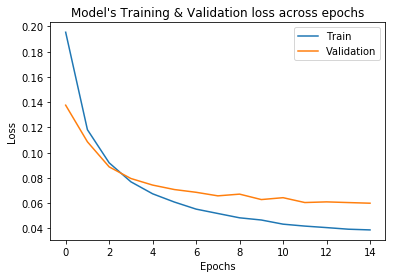

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Let plot the accuracy metric for the training and validation datasets

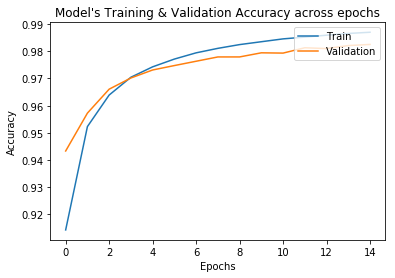

In [70]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()